In [1]:
import os
import sys
import json
from copy import deepcopy
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
!ls data_files/store_model_scores/sorted

test_set_q_candidate_model_scores_0.json
test_set_q_candidate_model_scores_1.json
test_set_q_candidate_model_scores_2.json
test_set_q_candidate_model_scores_3.json


#### Load the sorted scores thing (assume zero-based numbeering)

In [4]:
INPUT_FILE_PATH="data_files/store_model_scores/sorted_pruned/"

In [5]:
file_idx=0

with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{file_idx}.json",'r') as fd:
    df=json.load(fd)

df['440482']

In [6]:
def fetch_rank_of_duplicates(q_obj, model_idx):
    ranks=[]
    for curr_contender in q_obj['scores']:
        if curr_contender['candidate_qid'] not in q_obj['expected_questions']:
            continue
        ranks.append(curr_contender['rank'][model_idx])
    return ranks
        

In [7]:
THRESHOLD=20

In [8]:
def fetch_ranks_for_model(model_idx):
    lb_file_idx=0
    ub_file_idx=3
    curr_smai_q_id=-1
    x_c=[]
    y_c=[]
    
    worst_rank=None
    best_rank=None
    mean_rank=0
    correct_numerator=0
    # go through all files
    for curr_file_id in range(lb_file_idx, ub_file_idx+1):
        with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{curr_file_id}.json",'r') as fd:
            df=json.load(fd)
        print("file opened with id ", curr_file_id)
        
        # go through each question for whom we want a duplicate
        for curr_dup_q, curr_val in df.items():
            curr_smai_q_id+=1
            
            # fetch all duplicate ranks for this questions
            dups_rank=fetch_rank_of_duplicates(curr_val, model_idx)
            num_dups=len(dups_rank)
            #print("Number of dups is ", num_dups)
            
            best_pred=min(dups_rank)
            mean_rank+=best_pred
            if (best_rank==None) or (best_rank>best_pred):
                best_rank=best_pred
            if (worst_rank==None) or (worst_rank<best_pred):
                worst_rank=best_pred
            if best_pred<THRESHOLD:
                correct_numerator+=1
            y_c.extend(dups_rank)
            x_c.extend([curr_smai_q_id]*num_dups)
    print("NUMBER OF DUPS IN TOTAL IS ", len(x_c))
    return x_c, y_c, best_rank, worst_rank, mean_rank/100,correct_numerator/100

In [9]:
def plotting_scatterplot(this_df):
    q_df=this_df.copy()
    q_df['log_rank_of_duplicates']=np.log(q_df['rank_of_duplicates'])
    
    plt.title("[ON PRUNED SEARCH SPACE] Seeing distribution of ranks of expected dupes on a per question basis")

    sns.scatterplot(data=q_df, x="smai_q_id", y="log_rank_of_duplicates", hue="is_suggested", style="is_suggested")
    plt.axhline(np.log(THRESHOLD),lw=1,ls='dashed',
                    color='red',label='Threshold:'+f'{THRESHOLD}')
    
    fig, ax = plt.subplots()
    ax.axis([1, 10000, 1, 1000000])
    ax.loglog()
    plt.legend()
    #plt.show()

In [10]:
def plot_histogram(q_df):
    cars=q_df
    # look at price distribution
    fig = plt.figure(figsize=(16,5))
    ax = fig.gca()
    sns.distplot(cars["rank_of_duplicates"],kde=False,bins=60)
    plt.xlabel('Ranks',fontsize=14,fontweight="bold")
    plt.title('[ON PRUNED SEARCH SPACE] Distribution of ranks of expected duplicate questions',fontsize=18,fontweight="bold")
    plt.axvline(cars["rank_of_duplicates"].mean(),lw=2,ls='dashdot',
                color='black',label='Mean rank:'+'{0:.0f}'.format(np.mean(cars["rank_of_duplicates"])))
    plt.axvline(cars["rank_of_duplicates"].median(),lw=2,ls='dashed',
                color='red',label='Median rank:'+'{0:.0f}'.format(np.median(cars["rank_of_duplicates"])))
    plt.axvline(THRESHOLD,lw=2,ls='dashed',
                color='green',label='Threshold:'+f'{THRESHOLD}')
    
    plt.legend(loc='upper right',fontsize=16)
    #plt.xlim(-1,1000)

In [11]:
num_models=1

Model id is  0
file opened with id  0
file opened with id  1
file opened with id  2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  1358
MEAN Rank found is  99.9
FOund accuracy is  0.68


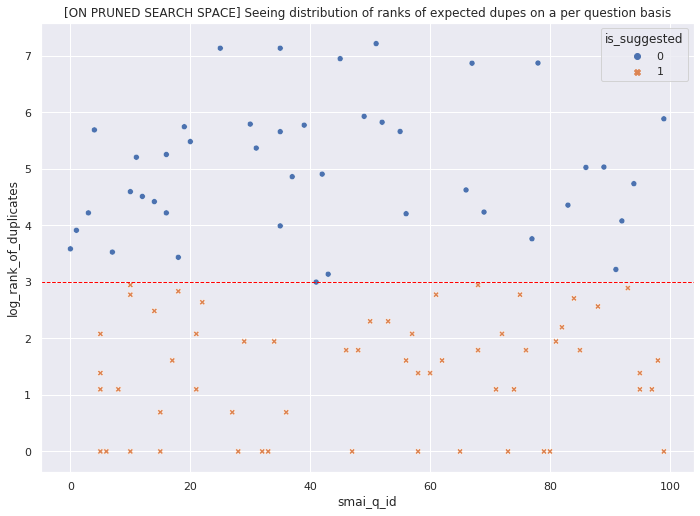

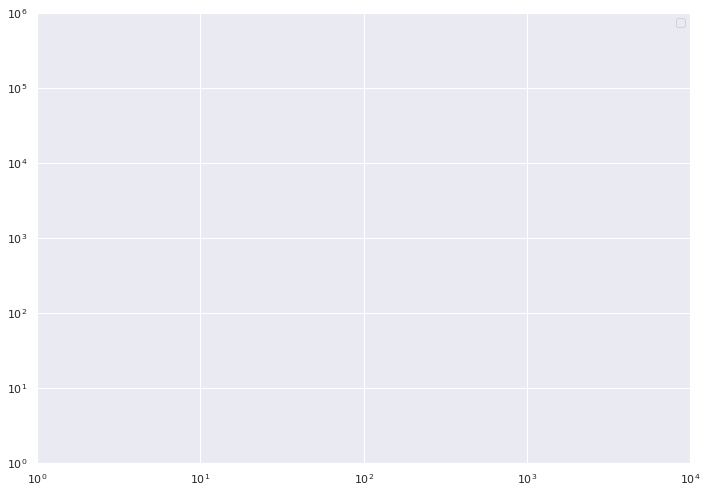

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


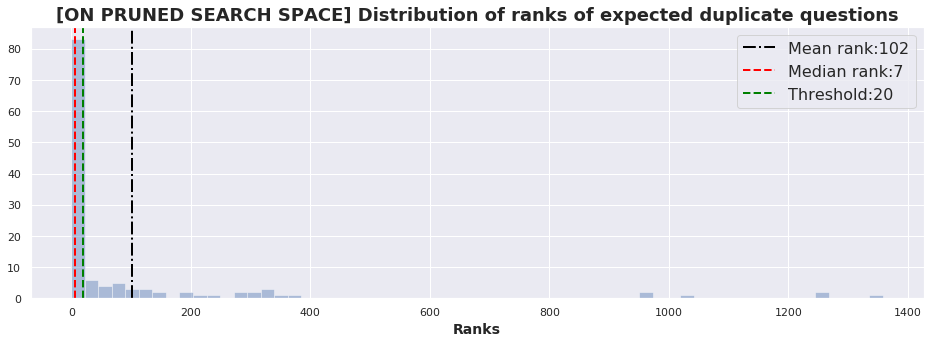

################################
Model id is  1
file opened with id  0
file opened with id  1
file opened with id  2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  4048
MEAN Rank found is  286.61
FOund accuracy is  0.53


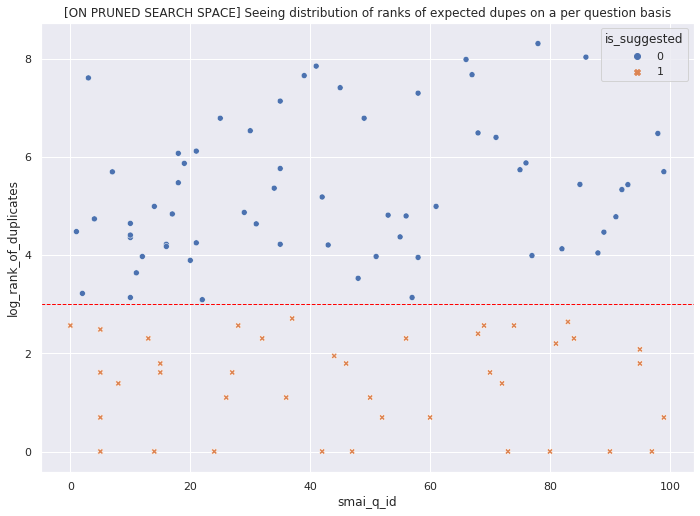

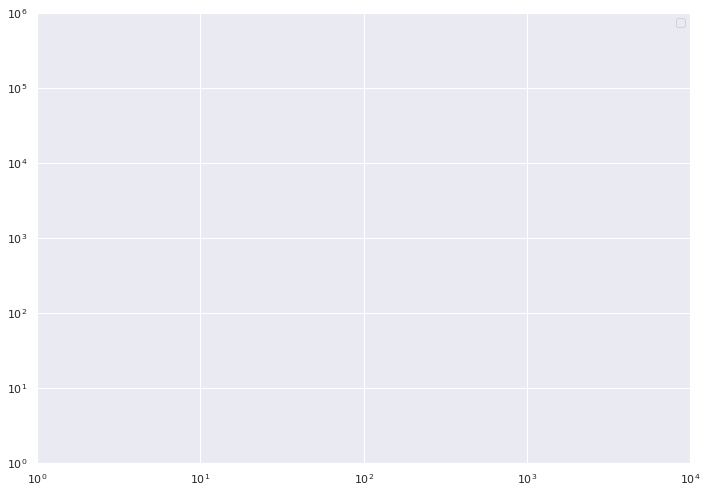

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


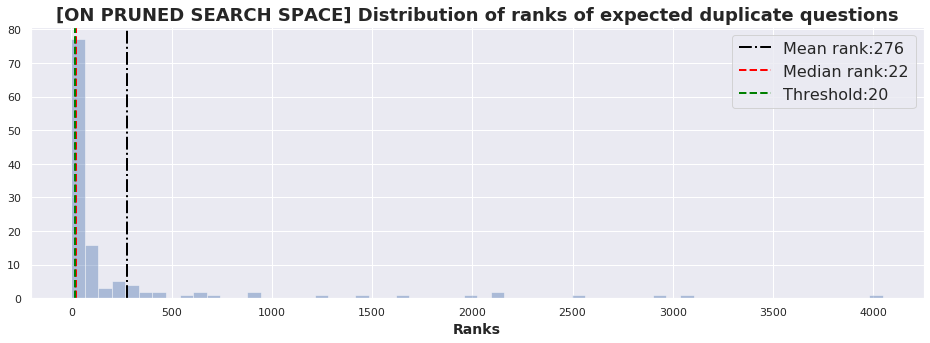

################################
Model id is  2
file opened with id  0
file opened with id  1
file opened with id  2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  3613
MEAN Rank found is  159.52
FOund accuracy is  0.61


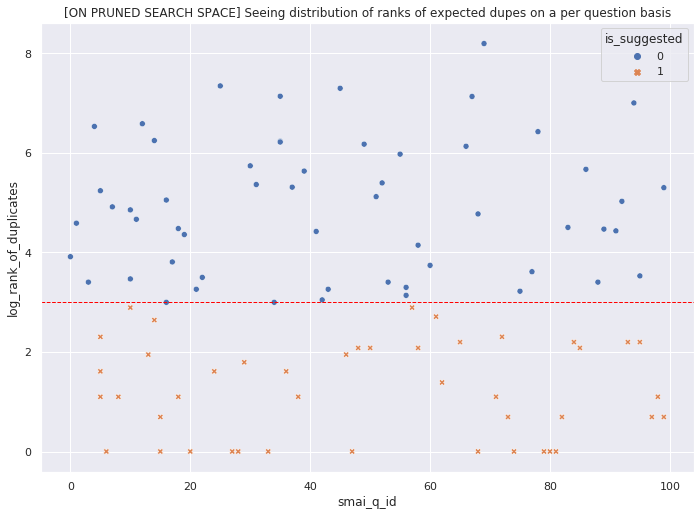

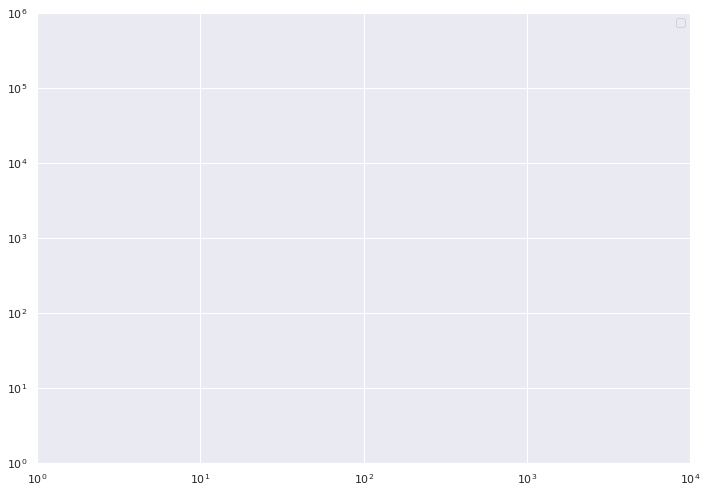

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


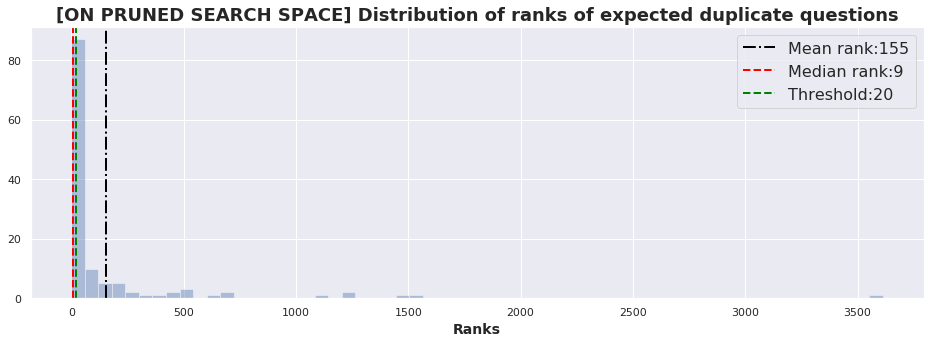

################################
Model id is  3
file opened with id  0
file opened with id  1
file opened with id  2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  1971
MEAN Rank found is  120.12
FOund accuracy is  0.62


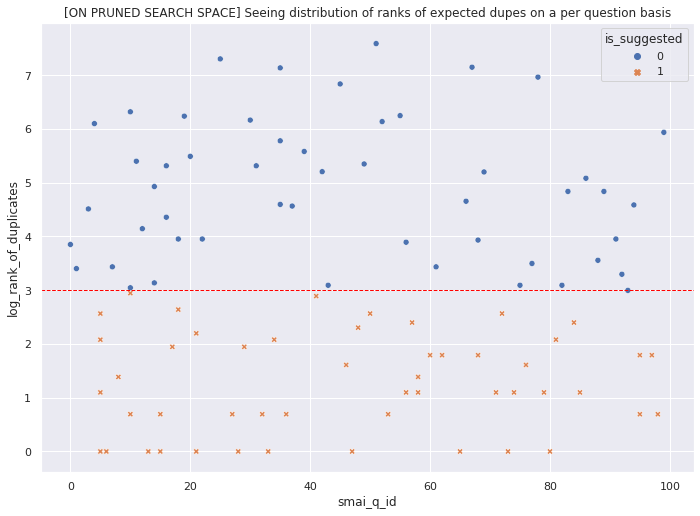

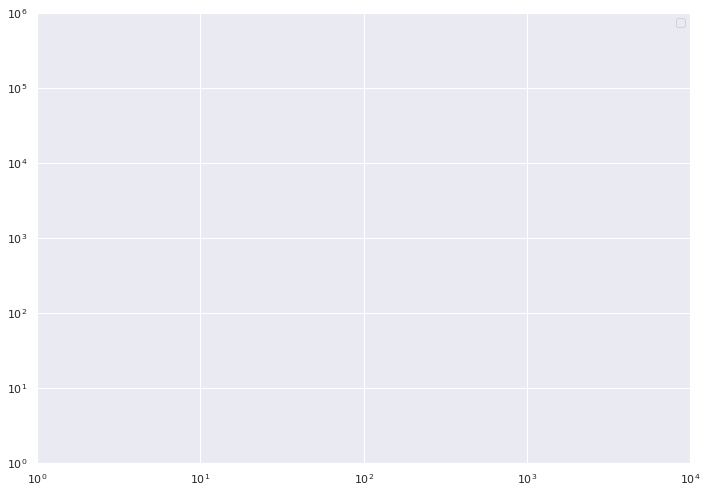

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


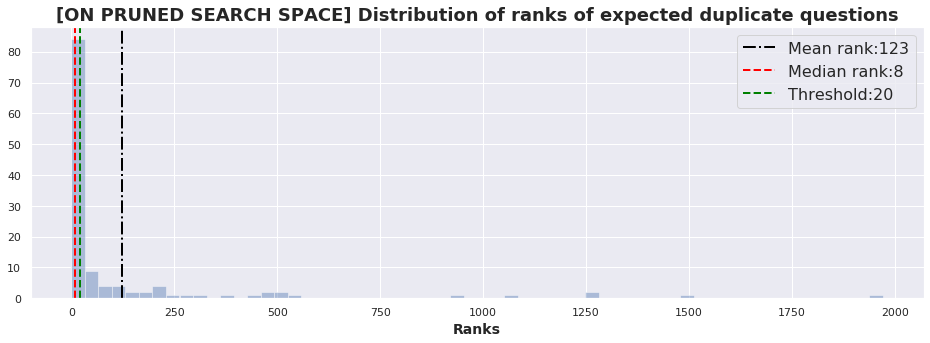

################################
Model id is  4
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  3177
MEAN Rank found is  122.65
FOund accuracy is  0.62


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


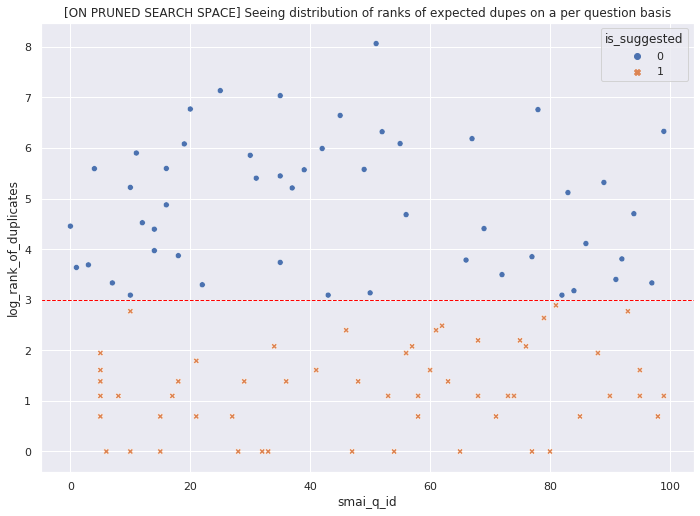

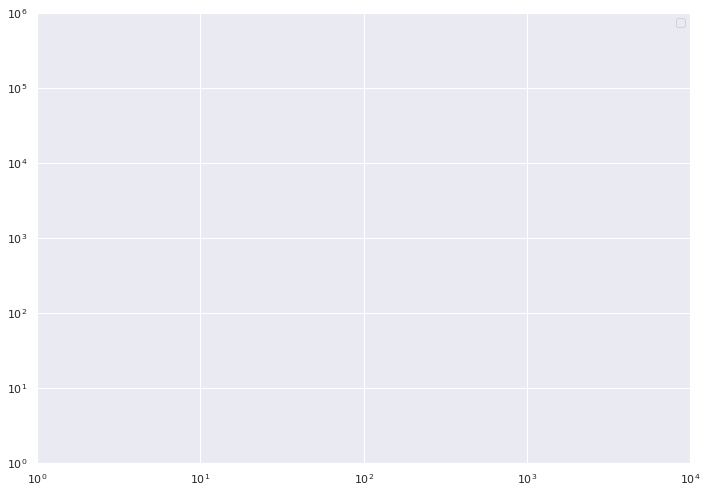

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


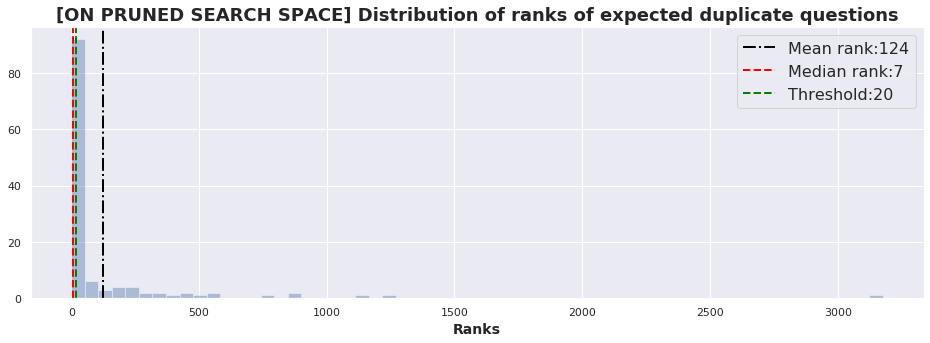

################################
Model id is  5
file opened with id  0
file opened with id  1
file opened with id  2


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


file opened with id  3
NUMBER OF DUPS IN TOTAL IS  125
Best rank is  0
Worst rank is  1197
MEAN Rank found is  78.38
FOund accuracy is  0.67


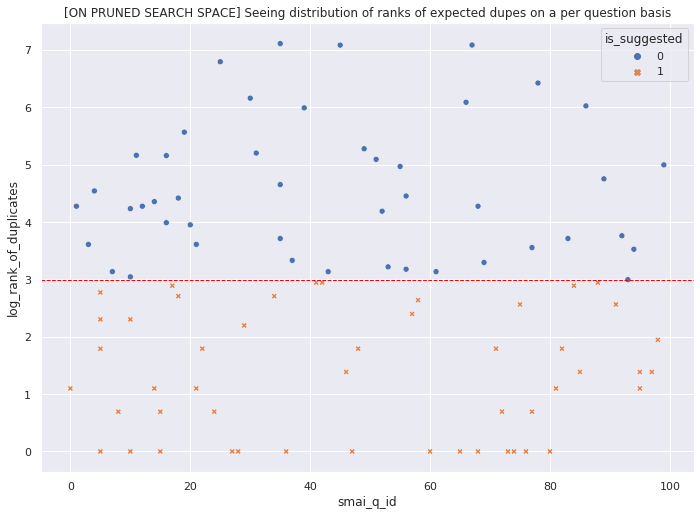

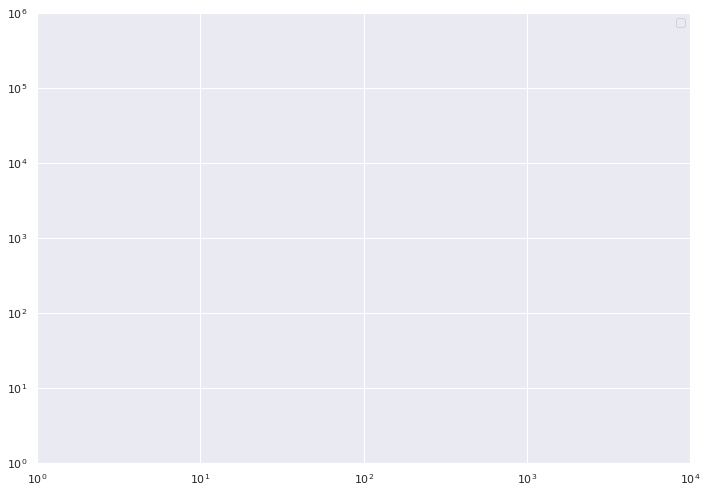

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


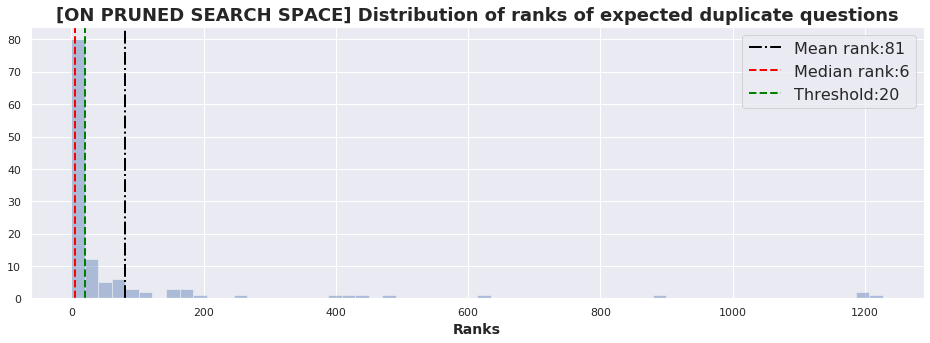

################################


In [12]:
for curr_model_idx in range(6):
    print("Model id is ", curr_model_idx)
    x_c, y_c, best_rank, worst_rank, mean_rank, accuracy=fetch_ranks_for_model(curr_model_idx)
    print("Best rank is ", best_rank)
    print("Worst rank is ", worst_rank)
    print("MEAN Rank found is ", mean_rank)
    print("FOund accuracy is ", accuracy)
    is_suggested=[1 if rank<THRESHOLD else 0 for rank in y_c ]
    dups_dict={"rank_of_duplicates":y_c, "smai_q_id":x_c, "is_suggested":is_suggested}
    q_df=pd.DataFrame(dups_dict)
    q_df=q_df[q_df['rank_of_duplicates']<5000]
    plotting_scatterplot(q_df)
    plt.show()
    plot_histogram(q_df)
    plt.show()
    print("################################")

    

In [13]:
#plt.show()
#sns.histplot(data=q_df, x="rank_of_duplicates",fill=False)

In [14]:
#sns.kdeplot(data=q_df, x="rank_of_duplicates")

In [15]:
#sorted(q_df['rank_of_duplicates'])

In [16]:
#sns.histplot(data=q_df, x="rank_of_duplicates",kde=True)
#plt.yscale('log', nonposy='clip')

In [17]:
#sns.distplot(x=q_df["rank_of_duplicates"])
#plt.axvline(x=20,linewidth=0.5, color='r')

In [18]:
#len(set(y_c))

 ### Showing reduction in search space

In [20]:
lb_file_idx=0
ub_file_idx=3
curr_smai_q_id=-1
x_c=[]
y_c=[]
# go through all files
for curr_file_id in range(lb_file_idx, ub_file_idx+1):
    with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{curr_file_id}.json",'r') as fd:
        df=json.load(fd)
    print("file opened with id ", curr_file_id)

    # go through each question for whom we want a duplicate
    for curr_dup_q, curr_val in df.items():
        curr_smai_q_id+=1

        x_c.append(curr_val['init_sss'])
        y_c.append(curr_val['final_sss'])

file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


In [21]:
len(x_c)

100

In [23]:
y_c

[9539,
 5656,
 2375,
 12394,
 958,
 7042,
 4,
 3685,
 20,
 6,
 6727,
 5057,
 5033,
 461,
 5954,
 5116,
 1078,
 162,
 8741,
 856,
 2914,
 9943,
 2475,
 5437,
 2491,
 4452,
 9690,
 9368,
 103,
 290,
 13984,
 2526,
 867,
 145,
 13245,
 1255,
 3784,
 3018,
 5254,
 4905,
 3903,
 13644,
 10346,
 231,
 2624,
 1862,
 361,
 3977,
 7194,
 2374,
 801,
 3857,
 14491,
 390,
 1058,
 4136,
 4667,
 9863,
 14185,
 1263,
 5168,
 9774,
 2676,
 36,
 4395,
 8156,
 8747,
 2150,
 909,
 9883,
 9989,
 5747,
 6050,
 3692,
 4980,
 3578,
 10112,
 5078,
 8622,
 5324,
 1251,
 1233,
 4856,
 3217,
 10210,
 953,
 5967,
 593,
 115,
 972,
 5877,
 10382,
 2886,
 5144,
 1648,
 308,
 5280,
 10543,
 4272,
 6207]

In [30]:
df=pd.DataFrame({"initial search space size":x_c, "final search space":y_c,"dups":x_c})

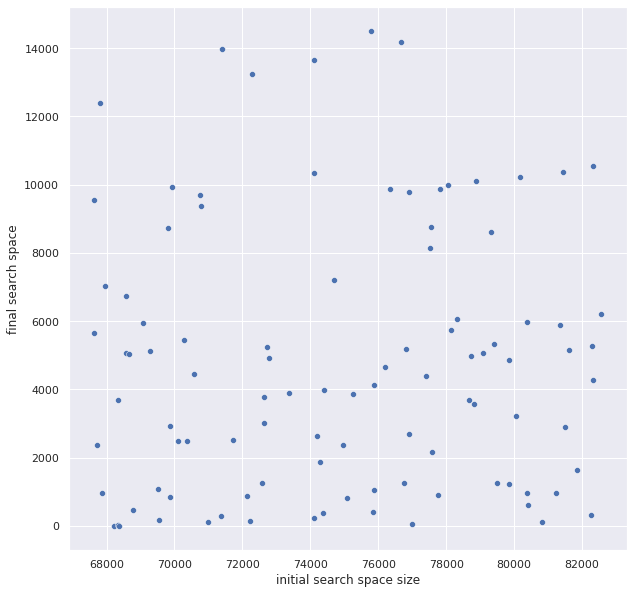

In [27]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df, x="initial search space size", y="final search space")


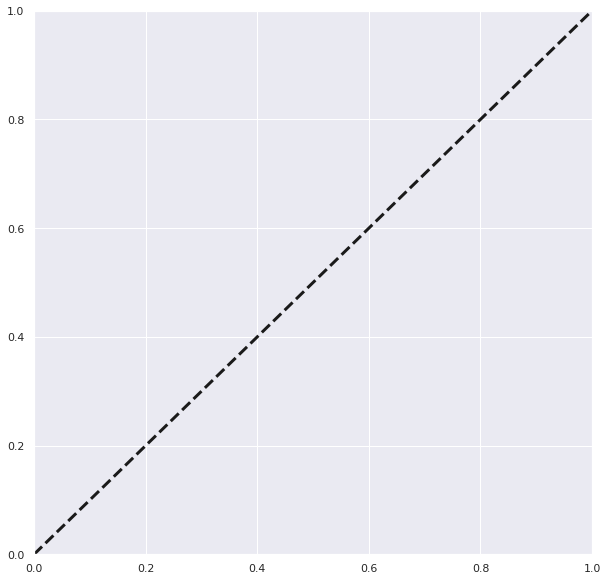

In [28]:
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [29]:
xpoints

(0.0, 1.0)

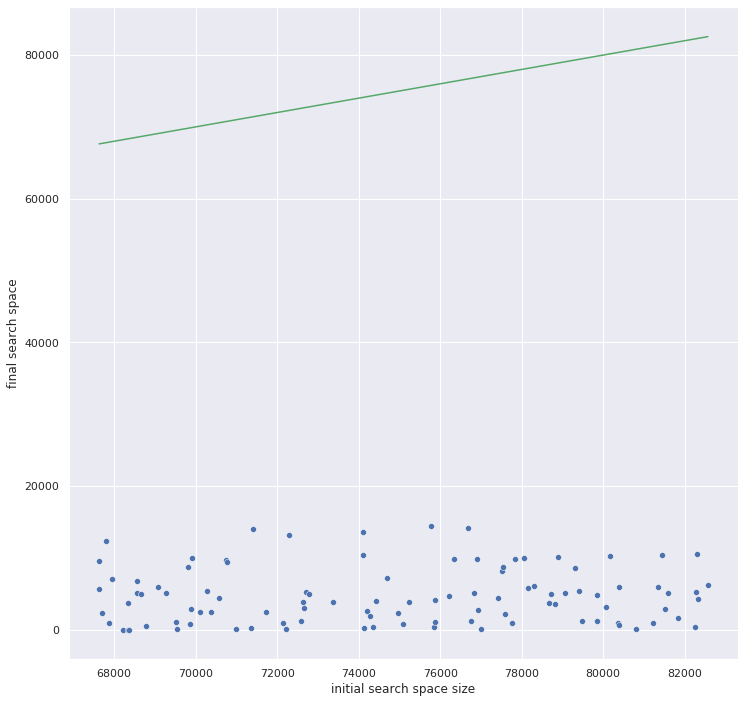

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=df, x="initial search space size", y="final search space",ax=ax)

#p1 = sns.scatterplot(data=df, x='x', y='y', ax=ax)
sns.lineplot(data=df, x="initial search space size", y='dups', color='g', ax=ax)